In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
hrdata = pd.read_csv('WAFhr-attrition.csv')

In [4]:
print(hrdata.shape)
hrdata.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
hrdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# hrdata.isnull().any() #none
hrdata.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
hrdata['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

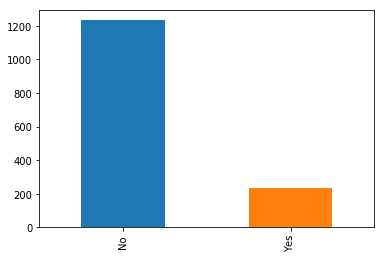

In [21]:
hrdata['Attrition'].value_counts().plot(kind='bar')

In [26]:
hrdata['Department'].value_counts(normalize=True)

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

/Users/tanya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


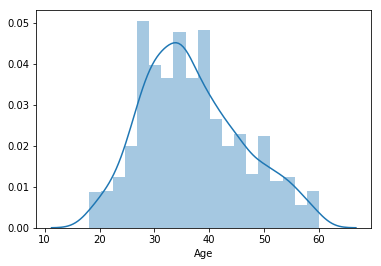

In [9]:
# EDA
sb.distplot(hrdata['Age'])

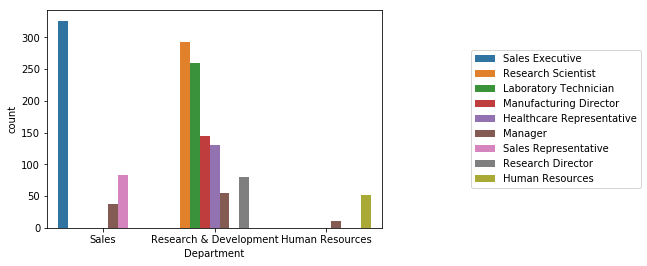

In [20]:
#Graph of functions within department
depjob = sb.countplot(data = hrdata, x='Department',hue='JobRole')
depjob.legend(loc='center left',bbox_to_anchor=(1.25,0.5),ncol=1)
plt.show()

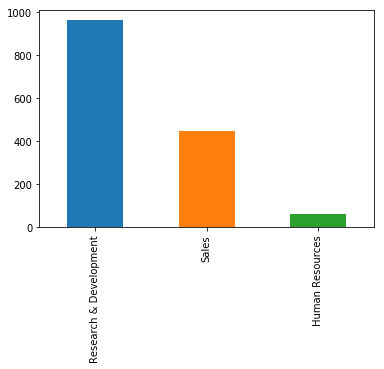

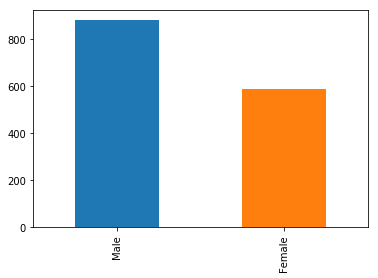

In [11]:
#plt.plot(hrdata['Department'])
hrdata['Department'].value_counts().plot(kind='bar')
plt.show()
hrdata['Gender'].value_counts().plot(kind='bar')

/Users/tanya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


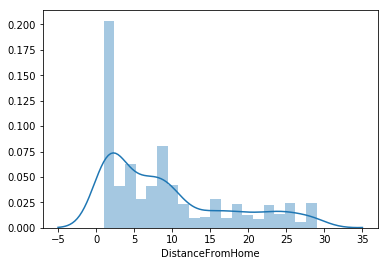

In [12]:
sb.distplot(hrdata['DistanceFromHome'],bins=20)

In [13]:
def kdePlot(var):
    fig = plt.figure(figsize=(12,4))
    ax=sb.kdeplot(hrdata.loc[(hrdata['Attrition'] == 'No'),var] , color='r',shade=True, label='No Attrition') 
    ax=sb.kdeplot(hrdata.loc[(hrdata['Attrition'] == 'Yes'),var] , color='g',shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))

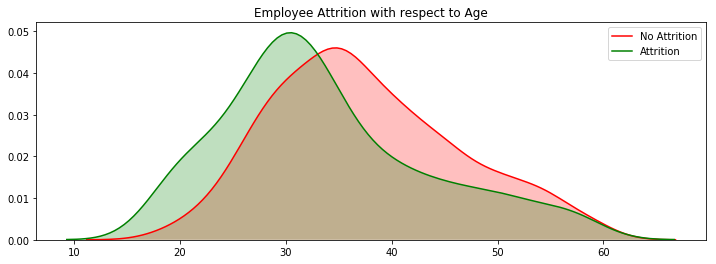

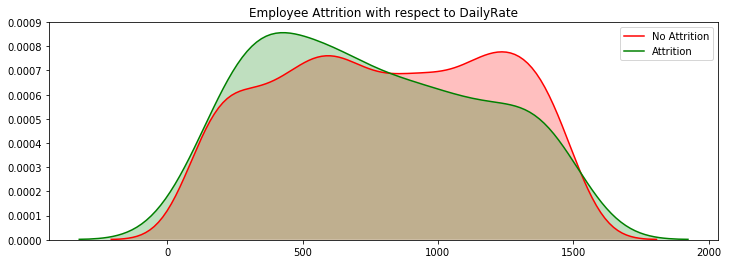

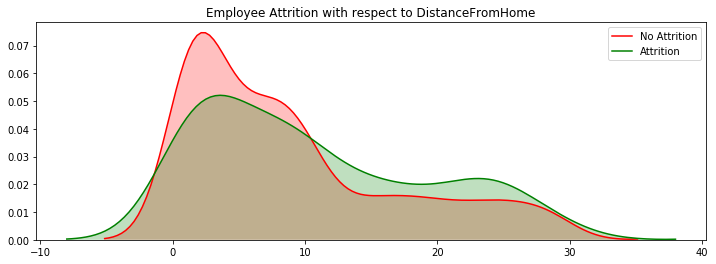

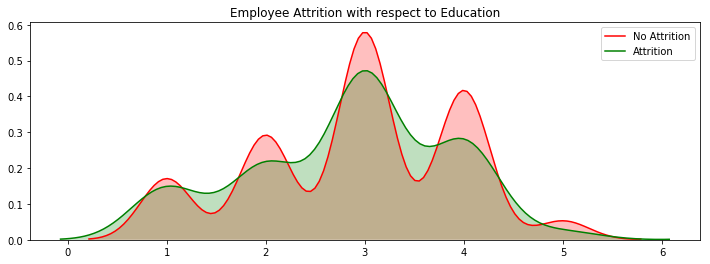

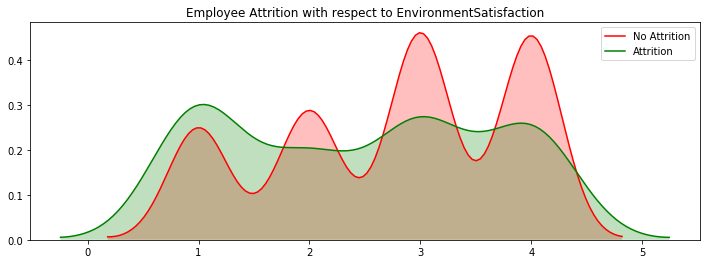

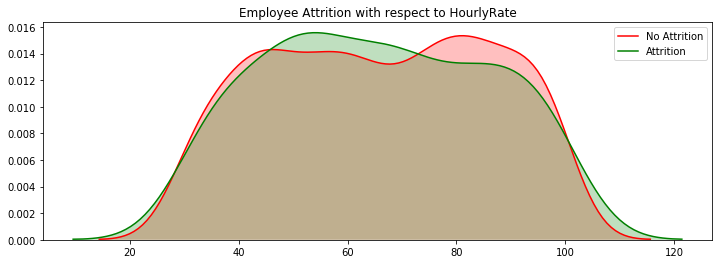

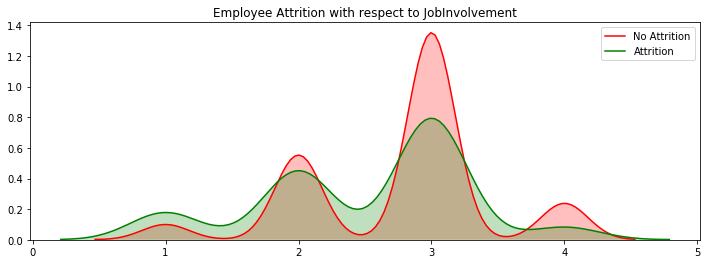

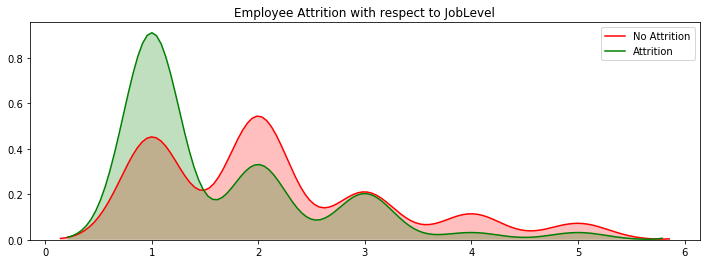

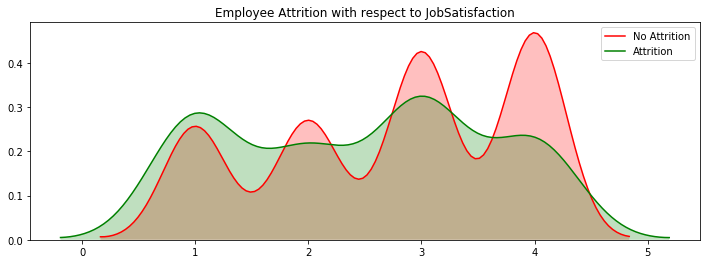

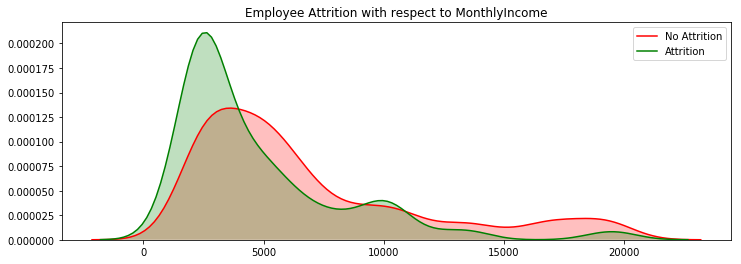

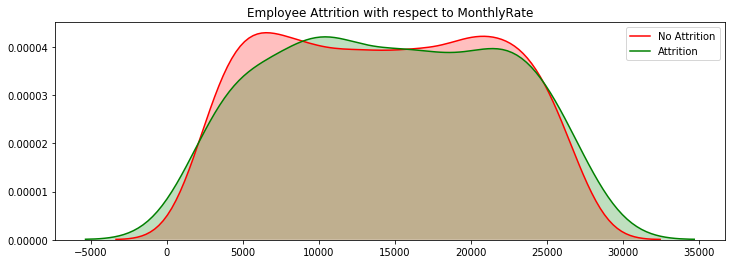

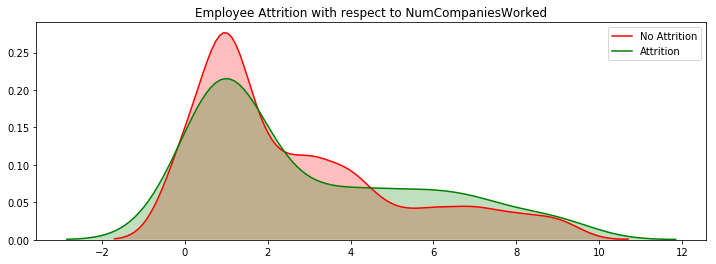

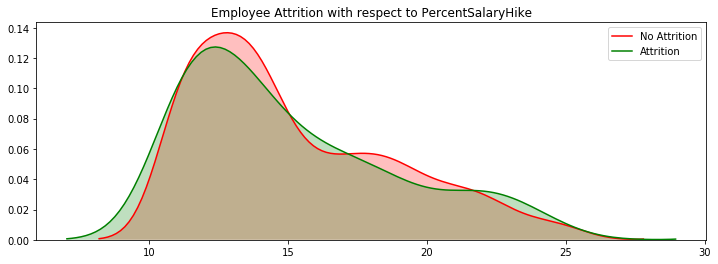

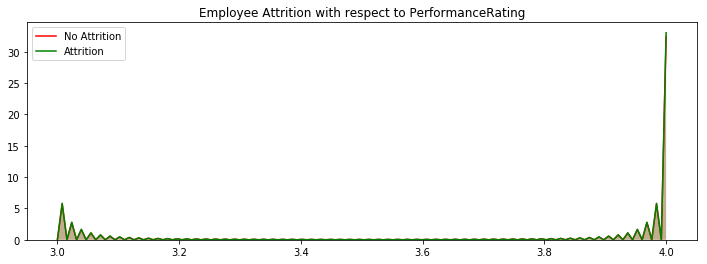

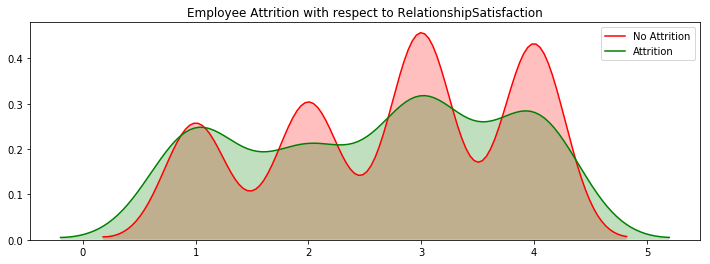

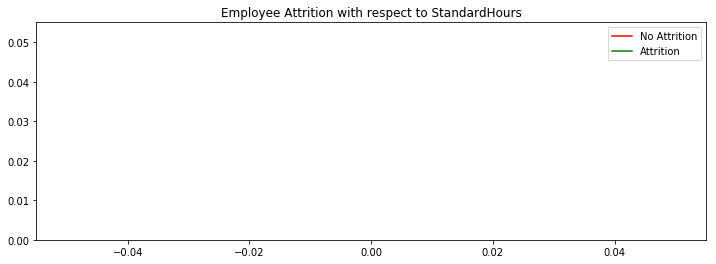

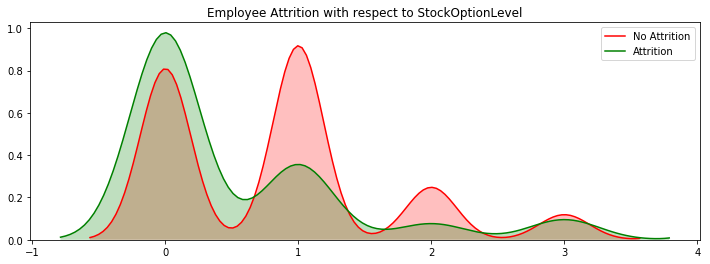

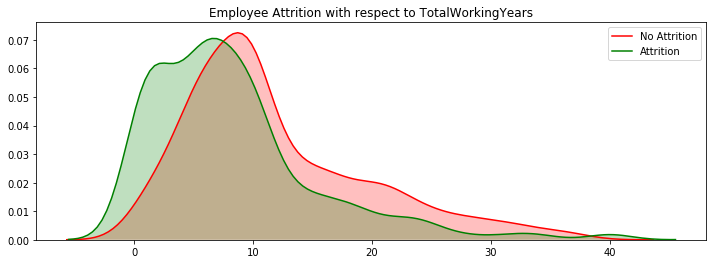

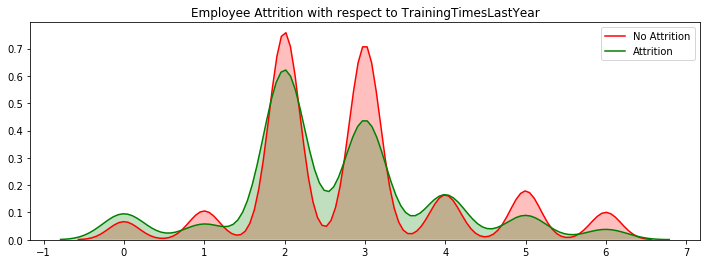

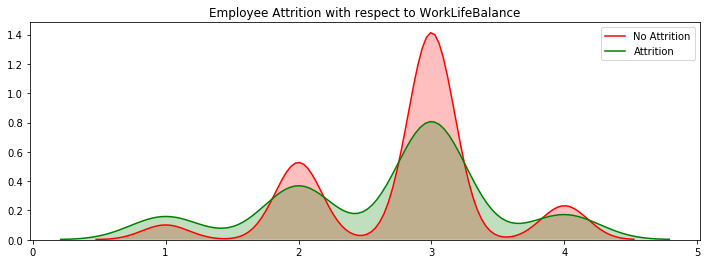

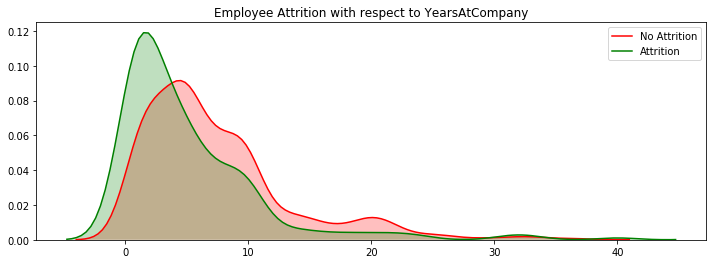

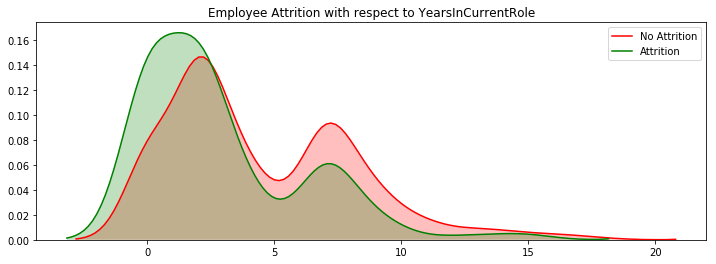

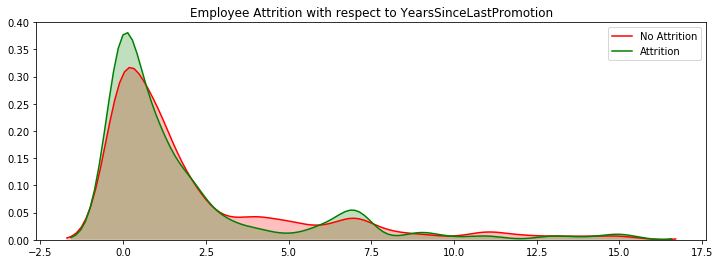

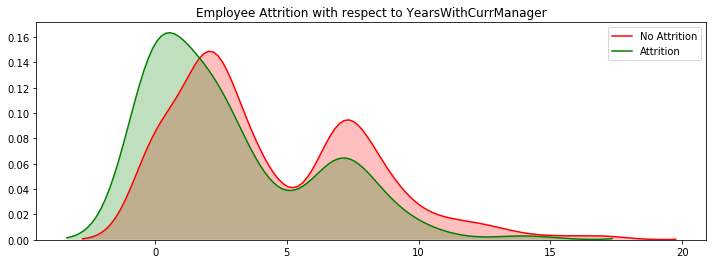

In [46]:
numerical_df=hrdata.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(numerical_df.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber',
'EnvironmentSatisfaction' ,'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion']
#
coltoplot = ['Age','DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
for l in remove_columns:
    numeric_cols_kdeplot.remove(l)
#for n in numeric_cols_kdeplot:
for n in coltoplot:
    kdePlot(n)

# FUCK


In [24]:
hrdata["EmployeeNumber"]

0          1
1          2
2          4
3          5
4          7
5          8
6         10
7         11
8         12
9         13
10        14
11        15
12        16
13        18
14        19
15        20
16        21
17        22
18        23
19        24
20        26
21        27
22        28
23        30
24        31
25        32
26        33
27        35
28        36
29        38
        ... 
1440    2025
1441    2026
1442    2027
1443    2031
1444    2032
1445    2034
1446    2035
1447    2036
1448    2037
1449    2038
1450    2040
1451    2041
1452    2044
1453    2045
1454    2046
1455    2048
1456    2049
1457    2051
1458    2052
1459    2053
1460    2054
1461    2055
1462    2056
1463    2057
1464    2060
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64

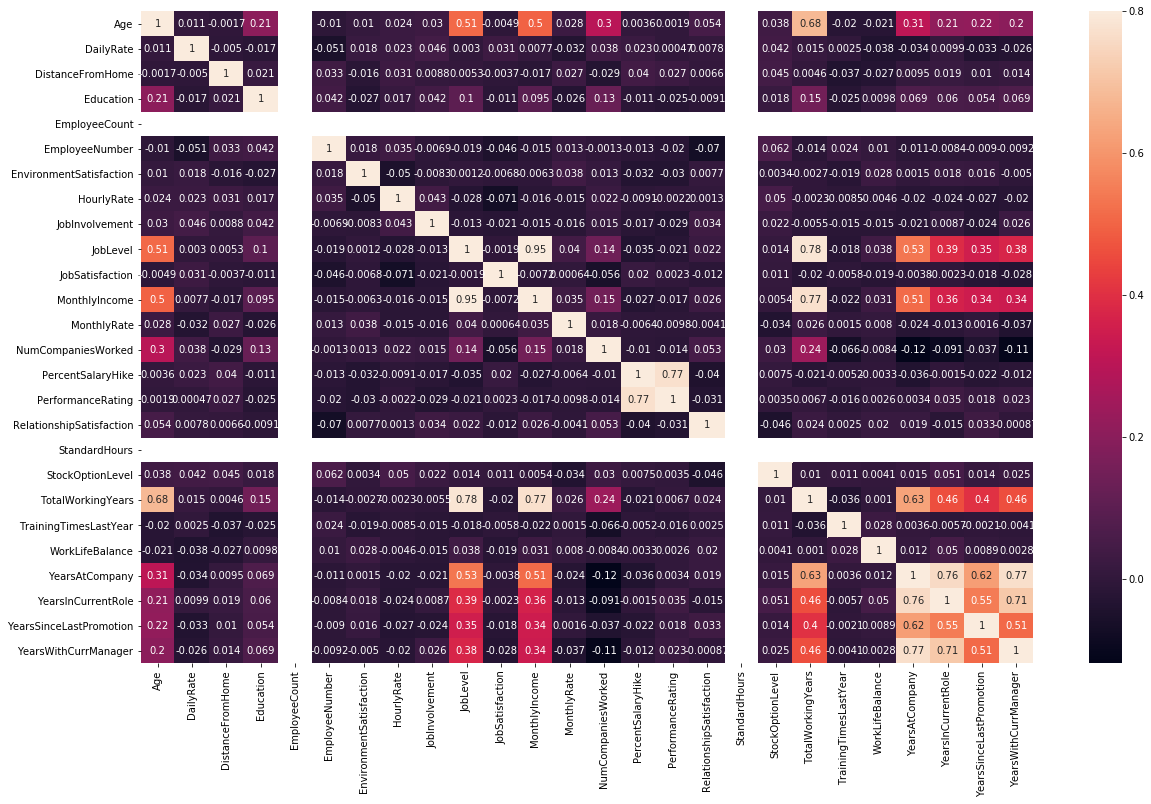

In [22]:
corr_matrix = hrdata.corr()
f , ax = plt.subplots(figsize=(20,12))
sb.heatmap(corr_matrix,vmax=0.8, annot=True)